# 《绝地求生》玩家排名预测
                   ---- 你能预测《绝地求生》玩家战斗结束后的排名吗？


![img1](./img/img1.png)

# 项目背景
## 项目简介
绝地求生(Player unknown's Battlegrounds)，俗称吃鸡，是一款战术竞技型射击类沙盒游戏。
这款游戏是一款大逃杀类型的游戏，每一局游戏将有最多100名玩家参与，他们将被投放在绝地岛(battlegrounds)上，在游戏的开始时所有人都一无所有。玩家需要在岛上收集各种资源，在不断缩小的安全区域内对抗其他玩家，让自己生存到最后。

该游戏拥有很高的自由度，玩家可以体验飞机跳伞、开越野车、丛林射击、抢夺战利品等玩法，小心四周埋伏的敌人，尽可能成为最后1个存活的人。


![img2](./img/img2.png)

## 项目涉及知识点
 - sklearn基本操作
 - 数据基本处理
 - 机器学习基本算法的使用


## 数据集介绍
本项目中，将为您提供大量匿名的《绝地求生》游戏统计数据。
其格式为每行包含一个玩家的游戏后统计数据，列为数据的特征值。
数据来自所有类型的比赛：单排，双排，四排；不保证每场比赛有100名人员，每组最多4名成员。

文件说明:

- train_V2.csv - 训练集

- test_V2.csv - 测试集


数据集局部图如下图所示:

![img3](./img/img3.png)

数据集中字段解释：

# 项目评估方式
## 评估方式
你必须创建一个模型，根据他们的最终统计数据预测玩家的排名，从1（第一名）到0（最后一名）。

最后结果通过平均绝对误差（MAE）进行评估，即通过预测的winPlacePerc和真实的winPlacePerc之间的平均绝对误差

## MAE(Mean Absolute Error)介绍
 - 就是绝对误差的平均值
 - 能更好地反映预测值误差的实际情况
     $$ MAE(X,h) = \frac{1}{m} \sum_{i=1}^{m} {|h(x^{(i)}) - y^{(i)}|}$$
 
api:
 - sklearn.metrics.mean_absolute_error

# 项目实现（数据分析+RF+lightGBM）
在接下来的分析中，我们将分析数据集，检测异常值。

然后我们通过随机森林模型对其训练，并对对该模型进行了优化。

In [1]:
# 导入数据基本处理阶段需要用到的api
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 获取数据、基本数据信息查看
导入数据，且查看数据的基本信息

In [2]:
train = pd.read_csv("./data/train_V2.csv")

In [3]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
train.tail()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0,0,0.000,0,0,1019.0,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0,0,0.000,0,0,81.7,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0,0,2.184,0,0,788.7,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0,0,0.000,0,0,2748.0,8,0,0.8000
4446965,0d8e7ed728b6fd,8c74f72fedf5ff,62a16aabcc095c,0,2,268.00,0,0,1,18,...,0,1369.0,0,0.000,0,0,1244.0,5,0,0.5464


In [5]:
train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

可以看到数据一共有4446966条，

In [7]:
train.shape

(4446966, 29)

In [8]:
# 查看一共有多少场比赛
np.unique(train["matchId"]).shape

(47965,)

In [9]:
# 查看一共有多少组
np.unique(train["groupId"]).shape

(2026745,)

## 数据基本处理
### 数据缺失值处理
查看目标值，我们发现有一条样本，比较特殊，其“winplaceperc”的值为NaN，也就是目标值是缺失值，

因为只有一个玩家是这样，直接进行删除处理。

In [10]:
# 查看缺失值
# np.any(train.isnull())
# 通过上面方法查看,发现只有"'winPlacePerc"列有缺失值;

# 寻找缺失值行
train[train['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [11]:
# 删除缺失值
train.drop(2744604, inplace=True)

In [12]:
train.shape

(4446965, 29)

### 特征数据规范化处理
#### 查看每场比赛参加的人数
处理完缺失值之后，我们看一下每场参加的人数会有多少呢，是每次都会匹配100个人，才开始游戏吗？

In [13]:
# 显示每场比赛参加人数
# transform的作用类似实现了一个一对多的映射功能，把统计数量映射到对应的每个样本上
count = train.groupby('matchId')['matchId'].transform('count')

In [14]:
train['playersJoined'] = count

In [15]:
count.count()

np.int64(4446965)

In [16]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


In [17]:
# 通过每场参加人数进行，按值升序排列
train["playersJoined"].sort_values().head()

1206365    2
2109739    2
3956552    5
3858347    5
696000     5
Name: playersJoined, dtype: int64

通过结果发现，最少的一局，竟然只有两个人，wtf!!!!

In [18]:
# 先看看playersJoined的基本统计信息
print("Players per match statistics:")
print(train['playersJoined'].describe())

Players per match statistics:
count    4.446965e+06
mean     9.419481e+01
std      6.686392e+00
min      2.000000e+00
25%      9.300000e+01
50%      9.500000e+01
75%      9.700000e+01
max      1.000000e+02
Name: playersJoined, dtype: float64


In [19]:
# 采样10%的数据进行可视化
sample_size = len(train) // 10
train_sample = train.sample(n=sample_size, random_state=42)

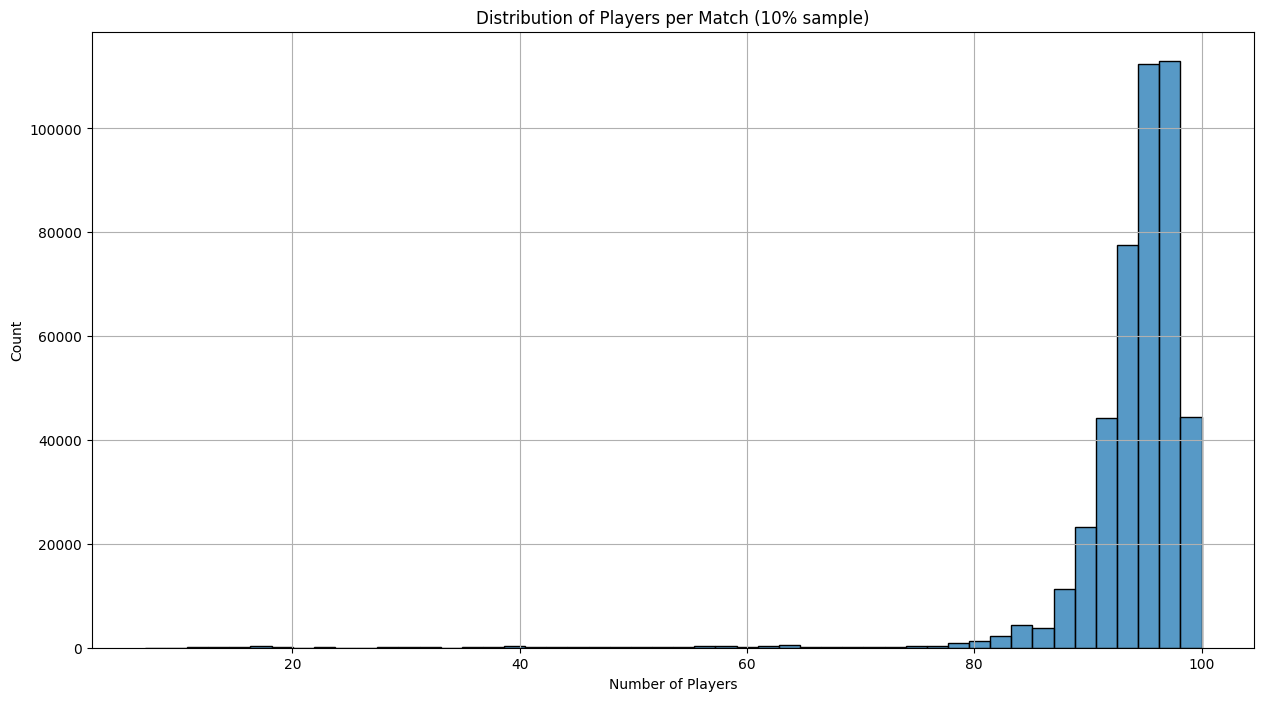

In [125]:
# 通过绘制图像，查看每局开始人数
plt.figure(figsize=(15, 8))
sns.histplot(data=train_sample, x='playersJoined', bins=50)
plt.title('Distribution of Players per Match (10% sample)')
plt.xlabel('Number of Players')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [ ]:
# 通过绘制图像，查看每局开始人数
# 通过seaborn下的countplot方法，可以直接绘制统计过数量之后的直方图
plt.figure(figsize=(20,10))
sns.countplot(train['playersJoined'])
plt.title('playersJoined')
plt.grid()
plt.show()

通过观察，发现一局游戏少于75个玩家，就开始的还是比较少

同时大部分游戏都是在接近100人的时候才开始

限制每局开始人数大于等于75，再进行绘制。

猜想：把这些数据在后期加入数据处理，应该会得到的结果更加准确一些

In [ ]:
# 再次绘制每局参加人数的直方图
plt.figure(figsize=(20,10))
sns.countplot(train[train['playersJoined']>=75]['playersJoined'])
plt.title('playersJoined')
plt.grid()
plt.show()

#### 规范化输出部分数据

现在我们统计了“每局玩家数量”，那么我们就可以通过“每局玩家数量”来进一步考证其它特征，同时对其规范化设置

试想：一局只有70个玩家的杀敌数，和一局有100个玩家的杀敌数，应该是不可以同时比较的

可以考虑的特征值包括
 - 1.kills（杀敌数）

 - 2.damageDealt（总伤害）

 - 3.maxPlace（本局最差名次）

 - 4.matchDuration（比赛时长）

In [20]:
# 对部分特征值进行规范化
train['killsNorm'] = train['kills']*((100-train['playersJoined'])/100 + 1)
train['damageDealtNorm'] = train['damageDealt']*((100-train['playersJoined'])/100 + 1)
train['maxPlaceNorm'] = train['maxPlace']*((100-train['playersJoined'])/100 + 1)
train['matchDurationNorm'] = train['matchDuration']*((100-train['playersJoined'])/100 + 1)

In [21]:
# 比较经过规范化的特征值和原始特征值的值
to_show = ['Id', 'kills','killsNorm','damageDealt', 'damageDealtNorm', 'maxPlace', 'maxPlaceNorm', 'matchDuration', 'matchDurationNorm']
train[to_show][0:11]

,Id,kills,killsNorm,damageDealt,damageDealtNorm,maxPlace,maxPlaceNorm,matchDuration,matchDurationNorm
0,7f96b2f878858a,0,0.00,0.000,0.00000,28,29.12,1306,1358.24
1,eef90569b9d03c,0,0.00,91.470,99.70230,26,28.34,1777,1936.93
2,1eaf90ac73de72,0,0.00,68.000,69.36000,50,51.00,1318,1344.36
3,4616d365dd2853,0,0.00,32.900,35.86100,31,33.79,1436,1565.24
4,315c96c26c9aac,1,1.03,100.000,103.00000,97,99.91,1424,1466.72
5,ff79c12f326506,1,1.05,100.000,105.00000,28,29.40,1395,1464.75
6,95959be0e21ca3,0,0.00,0.000,0.00000,28,28.84,1316,1355.48
7,311b84c6ff4390,0,0.00,8.538,8.87952,96,99.84,1967,2045.68
8,1a68204ccf9891,0,0.00,51.600,53.14800,28,28.84,1375,1416.25
9,e5bb5a43587253,0,0.00,37.270,38.38810,29,29.87,1930,1987.90


### 部分变量合成
此处我们把特征：heals(使用治疗药品数量)和boosts(能量、道具使用数量)合并成一个新的变量，命名：”healsandboosts“， 这是一个探索性过程，最后结果不一定有用，如果没有实际用处，最后再把它删除。

In [22]:
# 创建新变量“healsandboosts”
train['healsandboosts'] = train['heals'] + train['boosts']

In [23]:
train[["heals", "boosts", "healsandboosts"]].tail()

,heals,boosts,healsandboosts
4446961,0,0,0
4446962,0,1,1
4446963,0,0,0
4446964,2,4,6
4446965,1,2,3


### 异常值处理
#### 异常值处理：删除有击杀，但是完全没有移动的玩家
异常数据处理：

一些行中的数据统计出来的结果非常反常规，那么这些玩家肯定有问题，为了训练模型的准确性，我们会把这些异常数据剔除

通过以下操作，识别出玩家在游戏中有击杀数，但是全局没有移动；

这类型玩家肯定是存在异常情况（挂**），我们把这些玩家删除。

In [24]:
# 创建新变量，统计玩家移动距离
train['totalDistance'] = train['rideDistance'] + train['walkDistance'] + train['swimDistance']
# 创建新变量，统计玩家是否在游戏中，有击杀，但是没有移动，如果是返回True, 否则返回false
train['killsWithoutMoving'] = ((train['kills'] > 0) & (train['totalDistance'] == 0))

In [25]:
train["killsWithoutMoving"].head()

0    False
1    False
2    False
3    False
4    False
Name: killsWithoutMoving, dtype: bool

In [26]:
train["killsWithoutMoving"].describe()

count     4446965
unique          2
top         False
freq      4445430
Name: killsWithoutMoving, dtype: object

In [27]:
# 检查是否存在有击杀但是没有移动的数据
train[train['killsWithoutMoving'] == True].shape

(1535, 37)

In [28]:
train[train['killsWithoutMoving'] == True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPoints,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0,0.8571,58,8.52,842.060,21.30,842.06,3,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0,0.6000,42,4.74,547.628,17.38,2834.52,6,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0,0.8947,21,35.80,3132.500,35.80,1607.42,5,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,1500,0.0000,73,1.27,200.406,24.13,1014.73,0,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0,0.3000,42,1.58,158.000,17.38,2834.52,0,0.0,True


In [29]:
# 删除这些数据
train.drop(train[train['killsWithoutMoving'] == True].index, inplace=True)

In [30]:
train.shape

(4445430, 37)

#### 异常值处理：删除驾车杀敌数异常的数据

In [31]:
# 查看载具杀敌数超过十个的玩家
train[train['roadKills'] > 10]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPoints,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving
2733926,c3e444f7d1289f,489dd6d1f2b3bb,4797482205aaa4,0,0,1246.0,0,0,0,1,...,1371,0.4286,92,15.12,1345.68,99.36,1572.48,0,1282.302,False
2767999,34193085975338,bd7d50fa305700,a22354d036b3d6,0,0,1102.0,0,0,0,1,...,1533,0.4713,88,12.32,1234.24,98.56,2179.52,0,4934.600,False
2890740,a3438934e3e535,1081c315a80d14,fe744430ac0070,0,8,2074.0,0,1,11,1,...,1568,1.0000,38,32.40,3359.88,61.56,3191.40,19,5876.000,False
3524413,9d9d044f81de72,8be97e1ba792e3,859e2c2db5b125,0,3,1866.0,0,5,7,1,...,1606,0.9398,84,20.88,2164.56,97.44,2233.00,10,7853.000,False


In [32]:
# 删除这些数据
train.drop(train[train['roadKills'] > 10].index, inplace=True)

In [33]:
train.shape

(4445426, 37)

#### 异常值处理：删除玩家在一局中杀敌数超过30人的数据

In [ ]:
# 首先绘制玩家杀敌数的条形图
plt.figure(figsize=(10,4))
sns.countplot(train["kills"])
plt.show()

In [34]:
train[train['kills'] > 50].shape

(95, 37)

In [35]:
train[train['kills'] > 30].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPoints,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving
57978,9d8253e21ccbbd,ef7135ed856cd8,37f05e2a01015f,9,0,3725.0,0,7,0,2,...,1500,0.8571,16,64.40,6854.00,14.72,3308.32,0,48.82,False
87793,45f76442384931,b3627758941d34,37f05e2a01015f,8,0,3087.0,0,8,27,3,...,1500,1.0000,16,57.04,5680.08,14.72,3308.32,27,780.70,False
156599,746aa7eabf7c86,5723e7d8250da3,f900de1ec39fa5,21,0,5479.0,0,12,7,4,...,0,0.7000,11,90.72,10355.31,20.79,3398.22,7,23.71,False
160254,15622257cb44e2,1a513eeecfe724,db413c7c48292c,1,0,4033.0,0,40,0,1,...,1500,1.0000,62,57.96,5565.54,11.04,1164.72,0,718.30,False
180189,1355613d43e2d0,f863cd38c61dbf,39c442628f5df5,5,0,3171.0,0,6,15,1,...,0,1.0000,11,66.15,5993.19,17.01,3394.44,15,71.51,False


In [36]:
# 异常数据删除
train.drop(train[train['kills'] > 30].index, inplace=True)

#### 异常值处理：删除爆头率异常数据
如果一个玩家的击杀爆头率过高，也说明其有问题

In [37]:
# 创建变量爆头率
train['headshot_rate'] = train['headshotKills'] / train['kills']
train['headshot_rate'] = train['headshot_rate'].fillna(0)

In [38]:
train["headshot_rate"].tail()

4446961    0.0
4446962    0.0
4446963    0.0
4446964    0.5
4446965    0.0
Name: headshot_rate, dtype: float64

In [ ]:
# 绘制爆头率图像
plt.figure(figsize=(12,4))
sns.distplot(train['headshot_rate'], bins=10, kde=False)
plt.show()

In [39]:
train[(train['headshot_rate'] == 1) & (train['kills'] > 9)].shape

(24, 38)

In [40]:
train[(train['headshot_rate'] == 1) & (train['kills'] > 9)].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
281570,ab9d7168570927,add05ebde0214c,e016a873339c7b,2,3,1212.0,8,10,0,1,...,0.8462,93,10.70,1296.84,28.89,1522.61,3,2939.0,False,1.0
346124,044d18fc42fc75,fc1dbc2df6a887,628107d4c41084,3,5,1620.0,13,11,3,1,...,1.0000,96,11.44,1684.80,28.08,1796.08,8,8142.0,False,1.0
871244,e668a25f5488e3,5ba8feabfb2a23,f6e6581e03ba4f,0,4,1365.0,9,13,0,1,...,1.0000,98,13.26,1392.30,27.54,1280.10,4,2105.0,False,1.0
908815,566d8218b705aa,a9b056478d71b2,3a41552d553583,2,5,1535.0,10,10,3,1,...,0.9630,95,10.50,1611.75,29.40,1929.90,8,7948.0,False,1.0
963463,1bd6fd288df4f0,90584ffa22fe15,ba2de992ec7bb8,2,6,1355.0,12,10,2,1,...,1.0000,96,10.40,1409.20,28.08,1473.68,8,3476.0,False,1.0


In [41]:
train.drop(train[(train['headshot_rate'] == 1) & (train['kills'] > 9)].index, inplace=True)

#### 异常值处理：删除最远杀敌距离异常数据

In [ ]:
# 绘制图像
plt.figure(figsize=(12,4))
sns.distplot(train['longestKill'], bins=10, kde=False)
plt.show()

In [42]:
# 找出最远杀敌距离大于等于1km的玩家
train[train['longestKill'] >= 1000].shape

(20, 38)

In [43]:
train[train['longestKill'] >= 1000]["longestKill"].head()

202281    1000.0
240005    1004.0
324313    1026.0
656553    1000.0
803632    1075.0
Name: longestKill, dtype: float64

In [44]:
train.drop(train[train['longestKill'] >= 1000].index, inplace=True)

In [45]:
train.shape

(4445287, 38)

#### 异常值处理：删除关于运动距离的异常值

In [46]:
# 距离整体描述
train[['walkDistance', 'rideDistance', 'swimDistance', 'totalDistance']].describe()

,walkDistance,rideDistance,swimDistance,totalDistance
count,4.445287e+06,4.445287e+06,4.445287e+06,4.445287e+06
mean,1.154619e+03,6.063215e+02,4.510898e+00,1.765451e+03
std,1.183508e+03,1.498562e+03,3.050738e+01,2.183248e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.554000e+02,0.000000e+00,0.000000e+00,1.584000e+02
50%,6.863000e+02,0.000000e+00,0.000000e+00,7.892500e+02
75%,1.977000e+03,2.566000e-01,0.000000e+00,2.729000e+03
max,2.578000e+04,4.071000e+04,3.823000e+03,4.127010e+04


##### a）行走距离处理

In [47]:
train[train['walkDistance'] >= 10000].shape

(219, 38)

In [48]:
train[train['walkDistance'] >= 10000].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
23026,8a6562381dd83f,23e638cd6eaf77,b0a804a610e9b0,0,1,0.00,0,0,0,44,...,0.8163,99,0.00,0.0000,99.99,1925.06,1,13540.3032,False,0.0
34344,5a591ecc957393,6717370b51c247,a15d93e7165b05,0,3,23.22,0,0,1,34,...,0.9474,65,0.00,31.3470,27.00,2668.95,4,10070.9073,False,0.0
49312,582685f487f0b4,338112cd12f1e7,d0afbf5c3a6dc9,0,4,117.20,1,0,1,24,...,0.9130,94,1.06,124.2320,49.82,2323.52,5,12446.7588,False,0.0
68590,8c0d9dd0b4463c,c963553dc937e9,926681ea721a47,0,1,32.34,0,0,1,46,...,0.8333,96,0.00,33.6336,50.96,1909.44,2,12483.6200,False,0.0
94400,d441bebd01db61,7e179b3366adb8,923b57b8b834cc,1,1,73.08,0,0,3,27,...,0.8194,73,0.00,92.8116,92.71,2293.62,4,11490.6300,False,0.0


In [49]:
train.drop(train[train['walkDistance'] >= 10000].index, inplace=True)

#####  b）载具行驶距离处理

In [50]:
train[train['rideDistance'] >= 20000].shape

(150, 38)

In [51]:
train[train['rideDistance'] >= 20000].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
28588,6260f7c49dc16f,b24589f02eedd7,6ebea3b4f55b4a,0,0,99.2,0,0,1,30,...,0.6421,96,1.04,103.168,99.84,1969.76,1,26306.6,False,0.000000
63015,adb7dae4d0c10a,8ede98a241f30a,8b36eac66378e4,0,0,0.0,0,0,0,55,...,0.5376,94,0.00,0.000,99.64,2004.46,0,22065.4,False,0.000000
70507,ca6fa339064d67,f7bb2e30c3461f,3bfd8d66edbeff,0,0,100.0,0,0,0,26,...,0.8878,99,1.01,101.000,99.99,1947.28,0,28917.5,False,0.000000
72763,198e5894e68ff4,ccf47c82abb11f,d92bf8e696b61d,0,0,0.0,0,0,0,46,...,0.7917,97,0.00,0.000,99.91,1861.21,0,21197.2,False,0.000000
95276,c3fabfce7589ae,15529e25aa4a74,d055504340e5f4,0,7,778.2,0,1,2,2,...,0.9785,94,7.42,824.892,99.64,1986.44,9,26733.2,False,0.142857


In [52]:
train.drop(train[train['rideDistance'] >= 20000].index, inplace=True)

##### c）游泳距离处理

In [53]:
train[train['swimDistance'] >= 2000].shape

(12, 38)

In [54]:
train[train['swimDistance'] >= 2000][["swimDistance"]]

,swimDistance
177973,2295.0
274258,2148.0
1005337,2718.0
1195818,2668.0
1227362,3823.0
1889163,2484.0
2065940,3514.0
2327586,2387.0
2784855,2206.0
3359439,2338.0


In [55]:
train.drop(train[train['swimDistance'] >= 2000].index, inplace=True)

#### 异常值处理：武器收集异常值处理

In [56]:
train[train['weaponsAcquired'] >= 80].shape

(19, 38)

In [57]:
train[train['weaponsAcquired'] >= 80][['weaponsAcquired']].head()

,weaponsAcquired
233643,128
588387,80
1437471,102
1449293,95
1592744,94


In [58]:
train.drop(train[train['weaponsAcquired'] >= 80].index, inplace=True)

#### 异常值处理：删除使用治疗药品数量异常值

In [59]:
train[train['heals'] >= 40].shape

(135, 38)

In [60]:
train[train['heals'] >= 40][["heals"]].head()

,heals
18405,47
54463,43
126439,52
259351,42
268747,48


In [61]:
train.drop(train[train['heals'] >= 40].index, inplace=True)

In [62]:
train.shape

(4444752, 38)

### 类别型数据处理
#### 比赛类型one-hot处理

In [63]:
# 关于比赛类型，共有16种方式
train['matchType'].unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'crashfpp', 'flaretpp', 'normal-solo-fpp',
       'flarefpp', 'normal-duo-fpp', 'normal-duo', 'normal-squad',
       'crashtpp', 'normal-solo'], dtype=object)

In [64]:
# 对matchType进行one_hot编码
# 通过在后面添加的方式,实现,赋值并不是替换
train = pd.get_dummies(train, columns=['matchType'])

In [65]:
train.shape

(4444752, 53)

In [66]:
# 通过正则匹配查看具体内容
matchType_encoding = train.filter(regex='matchType')
matchType_encoding.head()

,matchType_crashfpp,matchType_crashtpp,matchType_duo,matchType_duo-fpp,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


#### 对groupId,matchId等数据进行处理
关于groupId,matchId这类型数据，也是类别型数据。但是它们的数据量特别多，如果你使用one-hot编码，无异于自杀。

在这儿我们把它们变成用数字统计的类别型数据依旧不影响我们正常使用。

In [67]:
# 把groupId 和 match Id 转换成类别类型 categorical types
# 就是把一堆不怎么好识别的内容转换成数字

# 转换group_id
train["groupId"].head()

0    4d4b580de459be
1    684d5656442f9e
2    6a4a42c3245a74
3    a930a9c79cd721
4    de04010b3458dd
Name: groupId, dtype: object

In [68]:
train['groupId'] = train['groupId'].astype('category')

In [69]:
train["groupId"].head()

0    4d4b580de459be
1    684d5656442f9e
2    6a4a42c3245a74
3    a930a9c79cd721
4    de04010b3458dd
Name: groupId, dtype: category
Categories (2026153, object): ['00000c08b5be36', '00000d1cbbc340', '000025a09dd1d7', '000038ec4dff53', ..., 'fffff305a0133d', 'fffff32bc7eab9', 'fffff7edfc4050', 'fffff98178ef52']

In [70]:
train["groupId_cat"] = train["groupId"].cat.codes

In [71]:
train["groupId_cat"].head()

0     613591
1     827580
2     843271
3    1340070
4    1757334
Name: groupId_cat, dtype: int32

In [72]:
# 转换match_id
train['matchId'] = train['matchId'].astype('category')

train['matchId_cat'] = train['matchId'].cat.codes


In [73]:
# 删除之前列
train.drop(['groupId', 'matchId'], axis=1, inplace=True)

# 查看新产生列
train[['groupId_cat', 'matchId_cat']].head()

,groupId_cat,matchId_cat
0,613591,30085
1,827580,32751
2,843271,3143
3,1340070,45260
4,1757334,20531


In [74]:
train.head()

,Id,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,...,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,groupId_cat,matchId_cat
0,7f96b2f878858a,0,0,0.00,0,0,0,60,1241,0,...,False,False,False,False,False,False,False,True,613591,30085
1,eef90569b9d03c,0,0,91.47,0,0,0,57,0,0,...,False,False,False,False,False,False,False,True,827580,32751
2,1eaf90ac73de72,1,0,68.00,0,0,0,47,0,0,...,False,False,False,False,False,False,False,False,843271,3143
3,4616d365dd2853,0,0,32.90,0,0,0,75,0,0,...,False,False,False,False,False,False,False,True,1340070,45260
4,315c96c26c9aac,0,0,100.00,0,0,0,45,0,1,...,False,False,False,False,False,True,False,False,1757334,20531


### 数据截取
#### 取部分数据进行使用（1000000）

In [75]:
# 取前100万条数据，进行训练
sample = 1000000
df_sample = train.sample(sample)

In [76]:
df_sample.shape

(1000000, 53)

### 确定特征值和目标值

In [77]:
# 确定特征值和目标值
df = df_sample.drop(["winPlacePerc", "Id"], axis=1) #all columns except target

y = df_sample['winPlacePerc'] # Only target variable

In [78]:
df.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,groupId_cat,matchId_cat
2786044,0,0,325.7,0,0,1,68,0,0,0,...,False,False,False,False,False,False,False,True,373040,38588
609855,0,0,0.0,0,0,0,79,1119,0,0,...,False,False,False,False,False,False,False,True,1976227,18142
2147355,0,3,0.0,0,0,1,50,1282,0,0,...,False,False,False,False,False,False,False,False,1808635,32864
1495283,0,0,0.0,0,0,0,88,0,0,0,...,False,False,False,False,False,False,False,True,1225748,23085
2087455,2,5,123.2,1,0,6,25,1307,1,1,...,False,False,False,False,False,False,False,True,1207785,8328


In [79]:
y.head()

2786044    0.3571
609855     0.1818
2147355    0.8750
1495283    0.0741
2087455    0.7692
Name: winPlacePerc, dtype: float64

In [80]:
print(df.shape, y.shape)

(1000000, 51) (1000000,)


### 分割训练集和测试集

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(df, y, test_size=0.2)

## 机器学习（模型训练）和评估

In [82]:
# 导入需要训练和评估api
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

### 使用随机森林对模型进行训练
#### 初步使用随机森林进行模型训练

In [83]:
# 模型训练
m1 = RandomForestRegressor(n_estimators=40, 
                           min_samples_leaf=3, 
                           max_features='sqrt',
                           n_jobs=-1)
# n_jobs=-1 表示训练的时候，并行数和cpu的核数一样，如果传入具体的值，表示用几个核去跑

m1.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=3, n_estimators=40,
                      n_jobs=-1)

In [84]:
y_pre = m1.predict(X_valid)
m1.score(X_valid, y_valid)

0.9209494178668806

In [85]:
mean_absolute_error(y_true=y_valid, y_pred=y_pre)

0.06153119485731244

经过第一次计算，得出准确率为：0.92， mae=0.061

#### 再次使用随机森林，进行模型训练
减少特征值，提高模型训练效率

In [86]:
# 查看特征值在当前模型中的重要程度
m1.feature_importances_

array([1.98421712e-03, 7.89700571e-02, 6.28151522e-03, 3.69553016e-03,
       2.45632900e-03, 3.90350822e-02, 1.74275834e-01, 1.97431462e-03,
       1.44086376e-02, 9.22454825e-03, 3.35621910e-02, 1.06066413e-02,
       5.97808002e-03, 7.40938406e-03, 3.46339207e-03, 2.49718832e-03,
       2.30751911e-02, 2.70095063e-05, 2.58414823e-03, 1.16832898e-04,
       2.15630075e-05, 2.16197061e-01, 7.04007243e-02, 2.29747637e-03,
       6.48608612e-03, 6.60976907e-03, 6.95349533e-03, 6.94598441e-03,
       1.20269341e-02, 7.09842545e-02, 1.64473943e-01, 0.00000000e+00,
       2.45530323e-03, 5.43616828e-05, 1.33629704e-06, 2.20387310e-04,
       4.64277383e-04, 1.43200600e-06, 2.60926924e-06, 0.00000000e+00,
       9.09692572e-05, 1.49685265e-06, 7.05742092e-06, 9.85562032e-07,
       2.25547891e-04, 2.24997407e-04, 1.03883375e-03, 1.14497390e-03,
       9.07828980e-04, 4.05935018e-03, 4.07483667e-03])

In [87]:
imp_df = pd.DataFrame({"cols":df.columns, "imp":m1.feature_importances_})

In [88]:
imp_df.head()

,cols,imp
0,assists,0.001984
1,boosts,0.078970
2,damageDealt,0.006282
3,DBNOs,0.003696
4,headshotKills,0.002456


In [89]:
imp_df = imp_df.sort_values("imp", ascending=False)

In [90]:
imp_df.head()

,cols,imp
21,walkDistance,0.216197
6,killPlace,0.174276
30,totalDistance,0.164474
1,boosts,0.078970
29,healsandboosts,0.070984


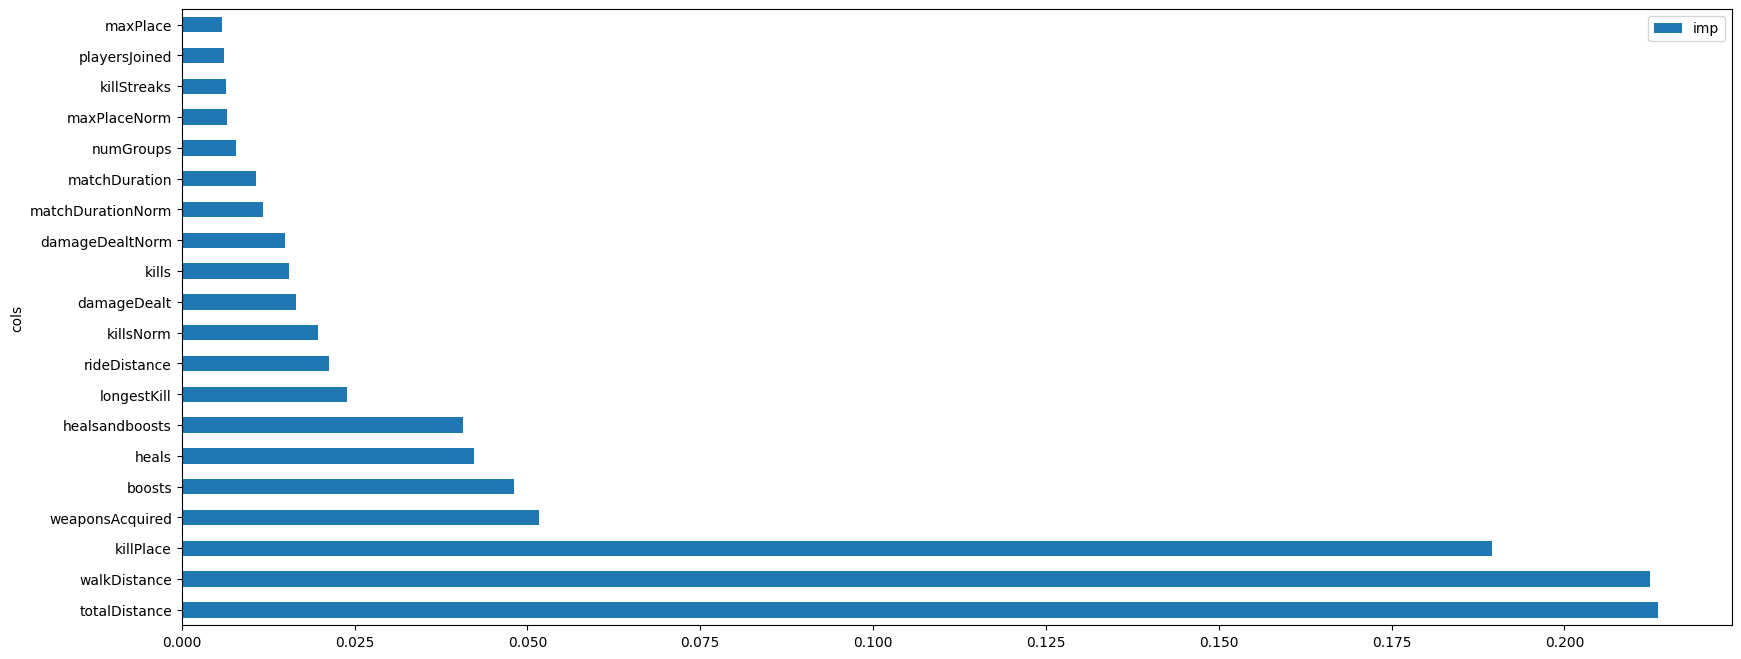

In [91]:
# 绘制特征重要性程度图，仅展示排名前二十的特征
imp_df[:20].plot('cols', 'imp', figsize=(20,8), kind = 'barh')
plt.show()

In [91]:
# 保留比较重要的特征
to_keep = imp_df[imp_df.imp>0.005].cols
print('Significant features: ', len(to_keep))
to_keep

Significant features:  20


21         walkDistance
6             killPlace
30        totalDistance
1                boosts
29       healsandboosts
22      weaponsAcquired
5                 heals
10          longestKill
16         rideDistance
8                 kills
28    matchDurationNorm
11        matchDuration
9           killStreaks
13            numGroups
26      damageDealtNorm
27         maxPlaceNorm
25            killsNorm
24        playersJoined
2           damageDealt
12             maxPlace
Name: cols, dtype: object

In [92]:
# 由这些比较重要的特征值，生成新的df
df[to_keep].head()

,walkDistance,killPlace,totalDistance,boosts,healsandboosts,weaponsAcquired,heals,longestKill,rideDistance,kills,matchDurationNorm,matchDuration,killStreaks,numGroups,damageDealtNorm,maxPlaceNorm,killsNorm,playersJoined,damageDealt,maxPlace
2786044,332.5,68,332.5,0,1,3,1,0.000,0.0,0,1387.36,1334,0,29,338.728,30.16,0.00,96,325.7,29
609855,160.3,79,160.3,0,0,2,0,0.000,0.0,0,1431.04,1376,0,33,0.000,35.36,0.00,96,0.0,34
2147355,1887.0,50,3798.0,3,4,4,1,0.000,1911.0,0,1401.83,1361,0,47,0.000,50.47,0.00,97,0.0,49
1495283,91.8,88,91.8,0,0,1,0,0.000,0.0,0,1984.50,1890,0,25,0.000,29.40,0.00,95,0.0,28
2087455,1960.0,25,2661.8,5,11,3,6,4.143,701.8,1,1554.00,1400,1,25,136.752,29.97,1.11,89,123.2,27


In [93]:
# 重新制定训练集和测试集
df_keep = df[to_keep]
X_train, X_valid, y_train, y_valid = train_test_split(df_keep, y, test_size=0.2)

In [94]:
X_train.shape

(800000, 20)

In [95]:
# 模型训练
m2 = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features='sqrt',
                          n_jobs=-1)
# n_jobs=-1 表示训练的时候，并行数和cpu的核数一样，如果传入具体的值，表示用几个核去跑

m2.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=3, n_estimators=40,
                      n_jobs=-1)

In [96]:
# 模型评分
y_pre = m2.predict(X_valid)
m2.score(X_valid, y_valid)

0.9251524737459554

In [97]:
# mae评估
mean_absolute_error(y_true=y_valid, y_pred=y_pre)

# 使用该种方法,最后得到的结果,反而更差,停止优化!

0.05964487577270492

### 使用lightGBM对模型进行训练

#### 模型初次尝试

In [98]:
import lightgbm as lgb

In [99]:
# 创建模型，训练模型
gbm = lgb.LGBMRegressor(objective='regression', 
                        num_leaves=31, 
                        learning_rate=0.05, 
                        n_estimators=20)

gbm.fit(X_train, y_train, 
        eval_set=[(X_valid, y_valid)], 
        eval_metric='l1')
# ps:最后几个参数必须一起使用.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3058
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 20
[LightGBM] [Info] Start training from score 0.472500


LGBMRegressor(learning_rate=0.05, n_estimators=20, objective='regression')

In [100]:
# 测试机预测
y_pred = gbm.predict(X_valid, num_iteration=gbm.best_iteration_)

In [101]:
mean_absolute_error(y_valid, y_pred)

0.12372565947350847

#### 模型二次调优

In [102]:
from sklearn.model_selection import GridSearchCV
# 网格搜索，参数优化
estimator = lgb.LGBMRegressor(num_leaves=31)
param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [20, 40, 60, 100, 200, 300]
}
gbm = GridSearchCV(estimator, param_grid, cv=5, n_jobs=-1) # 此处原来有个警告,通过此添加,解决掉!!!
gbm.fit(X_train, y_train)

KeyboardInterrupt: 

In [103]:
# 测试机预测
y_pred = gbm.predict(X_valid)
mean_absolute_error(y_valid, y_pred)

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [104]:
print('交叉验证\网格搜索调试后,最好的参数模型是:', gbm.best_params_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

#### 模型三次调优[思路]

In [105]:
# n_estimators
scores = []
n_estimators = [100, 500, 1000]

for nes in n_estimators:
    lgbm = lgb.LGBMRegressor(boosting_type='gbdt', 
                      num_leaves=31,
                      max_depth=5,
                      learning_rate=0.1,
                      n_estimators=nes,
                      min_child_samples=20,
                      n_jobs=-1)
    
    lgbm.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], eval_metric='l1', early_stopping_rounds=5)
    y_pre = lgbm.predict(X_valid)
    mae = mean_absolute_error(y_valid, y_pre)
    scores.append(mae)
    print("test data mae eval : {}".format(mae))

TypeError: LGBMRegressor.fit() got an unexpected keyword argument 'early_stopping_rounds'

[208]	valid_0's l1: 0.0573335	valid_0's l2: 0.00645639
[209]	valid_0's l1: 0.0573277	valid_0's l2: 0.00645537
[210]	valid_0's l1: 0.0573256	valid_0's l2: 0.00645507
[211]	valid_0's l1: 0.0573163	valid_0's l2: 0.00645337
[212]	valid_0's l1: 0.0573131	valid_0's l2: 0.00645262
[213]	valid_0's l1: 0.0573064	valid_0's l2: 0.00645148
[214]	valid_0's l1: 0.0573042	valid_0's l2: 0.00645085
[215]	valid_0's l1: 0.0572871	valid_0's l2: 0.00644752
[216]	valid_0's l1: 0.0572829	valid_0's l2: 0.0064466
[217]	valid_0's l1: 0.0572743	valid_0's l2: 0.00644461
[218]	valid_0's l1: 0.0572706	valid_0's l2: 0.00644412
[219]	valid_0's l1: 0.0572678	valid_0's l2: 0.00644322
[220]	valid_0's l1: 0.0572528	valid_0's l2: 0.0064393
[221]	valid_0's l1: 0.0572422	valid_0's l2: 0.00643719
[222]	valid_0's l1: 0.0572347	valid_0's l2: 0.00643581
[223]	valid_0's l1: 0.0572263	valid_0's l2: 0.00643393
[224]	valid_0's l1: 0.0572165	valid_0's l2: 0.00643245
[225]	valid_0's l1: 0.0572134	valid_0's l2: 0.00643117
[226]	valid_

[364]	valid_0's l1: 0.0566204	valid_0's l2: 0.00630079
[365]	valid_0's l1: 0.0566172	valid_0's l2: 0.00630019
[366]	valid_0's l1: 0.0566124	valid_0's l2: 0.0062984
[367]	valid_0's l1: 0.0566026	valid_0's l2: 0.00629652
[368]	valid_0's l1: 0.0565985	valid_0's l2: 0.00629574
[369]	valid_0's l1: 0.0565979	valid_0's l2: 0.00629539
[370]	valid_0's l1: 0.0565934	valid_0's l2: 0.0062938
[371]	valid_0's l1: 0.0565899	valid_0's l2: 0.00629314
[372]	valid_0's l1: 0.0565891	valid_0's l2: 0.00629302
[373]	valid_0's l1: 0.0565888	valid_0's l2: 0.0062927
[374]	valid_0's l1: 0.0565879	valid_0's l2: 0.00629234
[375]	valid_0's l1: 0.0565884	valid_0's l2: 0.00629281
[376]	valid_0's l1: 0.0565862	valid_0's l2: 0.00629266
[377]	valid_0's l1: 0.0565857	valid_0's l2: 0.00629245
[378]	valid_0's l1: 0.0565806	valid_0's l2: 0.00629124
[379]	valid_0's l1: 0.0565773	valid_0's l2: 0.00629098
[380]	valid_0's l1: 0.0565761	valid_0's l2: 0.00629082
[381]	valid_0's l1: 0.0565761	valid_0's l2: 0.00629063
[382]	valid_0

[37]	valid_0's l1: 0.0652681	valid_0's l2: 0.00838976
[38]	valid_0's l1: 0.0649006	valid_0's l2: 0.00828716
[39]	valid_0's l1: 0.0644844	valid_0's l2: 0.00817485
[40]	valid_0's l1: 0.0641535	valid_0's l2: 0.00809623
[41]	valid_0's l1: 0.0639052	valid_0's l2: 0.00804303
[42]	valid_0's l1: 0.0636884	valid_0's l2: 0.0080029
[43]	valid_0's l1: 0.0634446	valid_0's l2: 0.0079498
[44]	valid_0's l1: 0.0631861	valid_0's l2: 0.00788263
[45]	valid_0's l1: 0.0630324	valid_0's l2: 0.00785159
[46]	valid_0's l1: 0.0628667	valid_0's l2: 0.00781836
[47]	valid_0's l1: 0.0626865	valid_0's l2: 0.00776301
[48]	valid_0's l1: 0.0625642	valid_0's l2: 0.00774047
[49]	valid_0's l1: 0.0623984	valid_0's l2: 0.0077069
[50]	valid_0's l1: 0.0621945	valid_0's l2: 0.00766005
[51]	valid_0's l1: 0.0620303	valid_0's l2: 0.007622
[52]	valid_0's l1: 0.0619506	valid_0's l2: 0.00760474
[53]	valid_0's l1: 0.0618657	valid_0's l2: 0.00758933
[54]	valid_0's l1: 0.0617022	valid_0's l2: 0.00754466
[55]	valid_0's l1: 0.0616133	vali

[191]	valid_0's l1: 0.0574535	valid_0's l2: 0.00648553
[192]	valid_0's l1: 0.0574523	valid_0's l2: 0.00648468
[193]	valid_0's l1: 0.0574439	valid_0's l2: 0.00648231
[194]	valid_0's l1: 0.0574386	valid_0's l2: 0.00648106
[195]	valid_0's l1: 0.0574236	valid_0's l2: 0.00647759
[196]	valid_0's l1: 0.0574175	valid_0's l2: 0.00647631
[197]	valid_0's l1: 0.0574055	valid_0's l2: 0.00647349
[198]	valid_0's l1: 0.0574022	valid_0's l2: 0.00647307
[199]	valid_0's l1: 0.0573995	valid_0's l2: 0.00647162
[200]	valid_0's l1: 0.0573849	valid_0's l2: 0.00646739
[201]	valid_0's l1: 0.0573772	valid_0's l2: 0.00646651
[202]	valid_0's l1: 0.0573739	valid_0's l2: 0.00646628
[203]	valid_0's l1: 0.0573693	valid_0's l2: 0.00646513
[204]	valid_0's l1: 0.0573635	valid_0's l2: 0.00646349
[205]	valid_0's l1: 0.0573611	valid_0's l2: 0.0064624
[206]	valid_0's l1: 0.0573524	valid_0's l2: 0.00646074
[207]	valid_0's l1: 0.0573445	valid_0's l2: 0.00645949
[208]	valid_0's l1: 0.0573335	valid_0's l2: 0.00645639
[209]	valid

[344]	valid_0's l1: 0.056662	valid_0's l2: 0.00630982
[345]	valid_0's l1: 0.056658	valid_0's l2: 0.00630876
[346]	valid_0's l1: 0.0566579	valid_0's l2: 0.00630881
[347]	valid_0's l1: 0.0566577	valid_0's l2: 0.00630861
[348]	valid_0's l1: 0.0566561	valid_0's l2: 0.00630818
[349]	valid_0's l1: 0.0566534	valid_0's l2: 0.00630773
[350]	valid_0's l1: 0.0566486	valid_0's l2: 0.00630674
[351]	valid_0's l1: 0.0566477	valid_0's l2: 0.00630682
[352]	valid_0's l1: 0.0566454	valid_0's l2: 0.0063065
[353]	valid_0's l1: 0.0566426	valid_0's l2: 0.0063059
[354]	valid_0's l1: 0.0566419	valid_0's l2: 0.00630586
[355]	valid_0's l1: 0.0566393	valid_0's l2: 0.00630526
[356]	valid_0's l1: 0.0566375	valid_0's l2: 0.00630493
[357]	valid_0's l1: 0.0566355	valid_0's l2: 0.00630456
[358]	valid_0's l1: 0.056635	valid_0's l2: 0.00630451
[359]	valid_0's l1: 0.0566338	valid_0's l2: 0.0063042
[360]	valid_0's l1: 0.056626	valid_0's l2: 0.0063024
[361]	valid_0's l1: 0.0566251	valid_0's l2: 0.00630217
[362]	valid_0's l1

ValueError: x and y must have same first dimension, but have shapes (3,) and (0,)

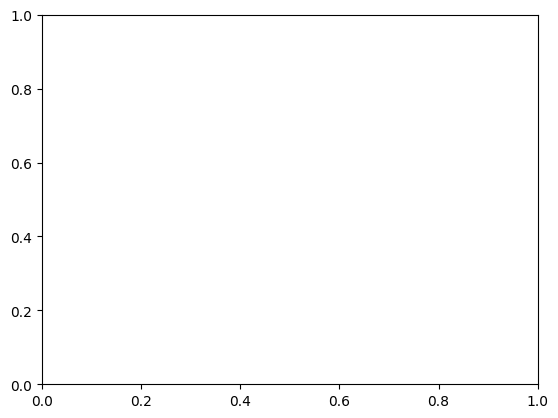

In [106]:
plt.plot(n_estimators,scores,'o-')
plt.ylabel("mae")
plt.xlabel("n_estimator")
print("best n_estimator {}".format(n_estimators[np.argmin(scores)]))

In [107]:
# max_depths
scores = []
max_depths = [1, 5, 7, 9]

for nes in max_depths:
    lgbm = lgb.LGBMRegressor(boosting_type='gbdt', 
                      num_leaves=31,
                      max_depth=nes,
                      learning_rate=0.1,
                      n_estimators=1000,
                      min_child_samples=20,
                      n_jobs=-1)
    lgbm.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], eval_metric='l1', early_stopping_rounds=5)
    y_pre = lgbm.predict(X_valid)
    mae = mean_absolute_error(y_valid, y_pre)
    scores.append(mae)
    print("test data mae eval : {}".format(mae))

TypeError: LGBMRegressor.fit() got an unexpected keyword argument 'early_stopping_rounds'

[321]	valid_0's l1: 0.0841735	valid_0's l2: 0.0135137
[322]	valid_0's l1: 0.0841679	valid_0's l2: 0.013509
[323]	valid_0's l1: 0.084148	valid_0's l2: 0.0135042
[324]	valid_0's l1: 0.0841471	valid_0's l2: 0.013499
[325]	valid_0's l1: 0.0841133	valid_0's l2: 0.013494
[326]	valid_0's l1: 0.0840976	valid_0's l2: 0.0134882
[327]	valid_0's l1: 0.0840973	valid_0's l2: 0.0134833
[328]	valid_0's l1: 0.0840639	valid_0's l2: 0.0134783
[329]	valid_0's l1: 0.0840694	valid_0's l2: 0.0134738
[330]	valid_0's l1: 0.0840499	valid_0's l2: 0.0134692
[331]	valid_0's l1: 0.084049	valid_0's l2: 0.0134639
[332]	valid_0's l1: 0.0840254	valid_0's l2: 0.0134594
[333]	valid_0's l1: 0.0840248	valid_0's l2: 0.0134544
[334]	valid_0's l1: 0.0839922	valid_0's l2: 0.0134495
[335]	valid_0's l1: 0.0839919	valid_0's l2: 0.0134447
[336]	valid_0's l1: 0.0839738	valid_0's l2: 0.0134402
[337]	valid_0's l1: 0.0839603	valid_0's l2: 0.0134349
[338]	valid_0's l1: 0.0839367	valid_0's l2: 0.0134304
[339]	valid_0's l1: 0.0839404	val

[475]	valid_0's l1: 0.0821496	valid_0's l2: 0.012867
[476]	valid_0's l1: 0.0821297	valid_0's l2: 0.0128636
[477]	valid_0's l1: 0.0821336	valid_0's l2: 0.0128601
[478]	valid_0's l1: 0.0821006	valid_0's l2: 0.0128564
[479]	valid_0's l1: 0.0820793	valid_0's l2: 0.0128527
[480]	valid_0's l1: 0.0820805	valid_0's l2: 0.0128491
[481]	valid_0's l1: 0.0820538	valid_0's l2: 0.0128456
[482]	valid_0's l1: 0.0820551	valid_0's l2: 0.012842
[483]	valid_0's l1: 0.0820399	valid_0's l2: 0.0128386
[484]	valid_0's l1: 0.0820448	valid_0's l2: 0.0128353
[485]	valid_0's l1: 0.0820191	valid_0's l2: 0.0128319
[486]	valid_0's l1: 0.0820212	valid_0's l2: 0.0128282
[487]	valid_0's l1: 0.0819951	valid_0's l2: 0.0128247
[488]	valid_0's l1: 0.0819843	valid_0's l2: 0.0128208
[489]	valid_0's l1: 0.0819867	valid_0's l2: 0.0128173
[490]	valid_0's l1: 0.0819608	valid_0's l2: 0.0128139
[491]	valid_0's l1: 0.0819621	valid_0's l2: 0.0128103
[492]	valid_0's l1: 0.0819359	valid_0's l2: 0.0128069
[493]	valid_0's l1: 0.0819383	

[631]	valid_0's l1: 0.0805786	valid_0's l2: 0.012371
[632]	valid_0's l1: 0.0805813	valid_0's l2: 0.0123682
[633]	valid_0's l1: 0.0805595	valid_0's l2: 0.0123654
[634]	valid_0's l1: 0.080563	valid_0's l2: 0.0123628
[635]	valid_0's l1: 0.0805468	valid_0's l2: 0.0123602
[636]	valid_0's l1: 0.0805481	valid_0's l2: 0.0123571
[637]	valid_0's l1: 0.0805265	valid_0's l2: 0.0123543
[638]	valid_0's l1: 0.080528	valid_0's l2: 0.0123513
[639]	valid_0's l1: 0.0805116	valid_0's l2: 0.0123487
[640]	valid_0's l1: 0.0805097	valid_0's l2: 0.0123459
[641]	valid_0's l1: 0.0804984	valid_0's l2: 0.0123432
[642]	valid_0's l1: 0.0804899	valid_0's l2: 0.0123404
[643]	valid_0's l1: 0.0804918	valid_0's l2: 0.0123376
[644]	valid_0's l1: 0.0804695	valid_0's l2: 0.0123349
[645]	valid_0's l1: 0.0804714	valid_0's l2: 0.0123322
[646]	valid_0's l1: 0.0804494	valid_0's l2: 0.0123295
[647]	valid_0's l1: 0.0804522	valid_0's l2: 0.0123269
[648]	valid_0's l1: 0.0804306	valid_0's l2: 0.0123242
[649]	valid_0's l1: 0.0804351	v

[792]	valid_0's l1: 0.0793127	valid_0's l2: 0.0119687
[793]	valid_0's l1: 0.0793119	valid_0's l2: 0.0119665
[794]	valid_0's l1: 0.0792975	valid_0's l2: 0.0119639
[795]	valid_0's l1: 0.0792838	valid_0's l2: 0.0119616
[796]	valid_0's l1: 0.0792867	valid_0's l2: 0.0119597
[797]	valid_0's l1: 0.0792695	valid_0's l2: 0.0119574
[798]	valid_0's l1: 0.0792715	valid_0's l2: 0.0119551
[799]	valid_0's l1: 0.0792522	valid_0's l2: 0.0119527
[800]	valid_0's l1: 0.0792433	valid_0's l2: 0.0119499
[801]	valid_0's l1: 0.0792455	valid_0's l2: 0.0119476
[802]	valid_0's l1: 0.0792268	valid_0's l2: 0.0119455
[803]	valid_0's l1: 0.0792298	valid_0's l2: 0.0119434
[804]	valid_0's l1: 0.0792118	valid_0's l2: 0.0119412
[805]	valid_0's l1: 0.079218	valid_0's l2: 0.0119392
[806]	valid_0's l1: 0.0792075	valid_0's l2: 0.0119372
[807]	valid_0's l1: 0.0792093	valid_0's l2: 0.0119347
[808]	valid_0's l1: 0.0791913	valid_0's l2: 0.0119326
[809]	valid_0's l1: 0.0791942	valid_0's l2: 0.0119303
[810]	valid_0's l1: 0.0791766

[951]	valid_0's l1: 0.0782712	valid_0's l2: 0.0116463
[952]	valid_0's l1: 0.0782734	valid_0's l2: 0.0116445
[953]	valid_0's l1: 0.0782575	valid_0's l2: 0.0116428
[954]	valid_0's l1: 0.0782599	valid_0's l2: 0.0116409
[955]	valid_0's l1: 0.0782468	valid_0's l2: 0.0116393
[956]	valid_0's l1: 0.0782493	valid_0's l2: 0.0116377
[957]	valid_0's l1: 0.0782398	valid_0's l2: 0.0116353
[958]	valid_0's l1: 0.0782254	valid_0's l2: 0.0116337
[959]	valid_0's l1: 0.0782285	valid_0's l2: 0.0116318
[960]	valid_0's l1: 0.0782139	valid_0's l2: 0.0116299
[961]	valid_0's l1: 0.0782163	valid_0's l2: 0.011628
[962]	valid_0's l1: 0.0782006	valid_0's l2: 0.0116263
[963]	valid_0's l1: 0.0782038	valid_0's l2: 0.0116244
[964]	valid_0's l1: 0.0781892	valid_0's l2: 0.0116228
[965]	valid_0's l1: 0.0781924	valid_0's l2: 0.011621
[966]	valid_0's l1: 0.0781759	valid_0's l2: 0.0116192
[967]	valid_0's l1: 0.0781825	valid_0's l2: 0.0116176
[968]	valid_0's l1: 0.0781741	valid_0's l2: 0.0116159
[969]	valid_0's l1: 0.0781765	

[106]	valid_0's l1: 0.0589043	valid_0's l2: 0.00683727
[107]	valid_0's l1: 0.0588527	valid_0's l2: 0.00682399
[108]	valid_0's l1: 0.0588104	valid_0's l2: 0.00681042
[109]	valid_0's l1: 0.0587857	valid_0's l2: 0.00680483
[110]	valid_0's l1: 0.0587581	valid_0's l2: 0.00679719
[111]	valid_0's l1: 0.0587335	valid_0's l2: 0.00679066
[112]	valid_0's l1: 0.058712	valid_0's l2: 0.00678597
[113]	valid_0's l1: 0.0587039	valid_0's l2: 0.0067833
[114]	valid_0's l1: 0.0586656	valid_0's l2: 0.00677397
[115]	valid_0's l1: 0.0586325	valid_0's l2: 0.00676673
[116]	valid_0's l1: 0.0586215	valid_0's l2: 0.00676278
[117]	valid_0's l1: 0.0585969	valid_0's l2: 0.00675665
[118]	valid_0's l1: 0.0585855	valid_0's l2: 0.00675394
[119]	valid_0's l1: 0.0585303	valid_0's l2: 0.00673981
[120]	valid_0's l1: 0.0585118	valid_0's l2: 0.00673499
[121]	valid_0's l1: 0.0584861	valid_0's l2: 0.00672953
[122]	valid_0's l1: 0.0584369	valid_0's l2: 0.0067154
[123]	valid_0's l1: 0.058406	valid_0's l2: 0.00670954
[124]	valid_0'

[263]	valid_0's l1: 0.0569727	valid_0's l2: 0.0063754
[264]	valid_0's l1: 0.0569716	valid_0's l2: 0.00637516
[265]	valid_0's l1: 0.0569695	valid_0's l2: 0.00637479
[266]	valid_0's l1: 0.0569644	valid_0's l2: 0.00637328
[267]	valid_0's l1: 0.0569613	valid_0's l2: 0.00637212
[268]	valid_0's l1: 0.0569608	valid_0's l2: 0.0063722
[269]	valid_0's l1: 0.0569593	valid_0's l2: 0.00637186
[270]	valid_0's l1: 0.0569547	valid_0's l2: 0.00637182
[271]	valid_0's l1: 0.0569521	valid_0's l2: 0.00637158
[272]	valid_0's l1: 0.0569519	valid_0's l2: 0.00637123
[273]	valid_0's l1: 0.0569525	valid_0's l2: 0.00637126
[274]	valid_0's l1: 0.0569434	valid_0's l2: 0.00637082
[275]	valid_0's l1: 0.0569353	valid_0's l2: 0.00636853
[276]	valid_0's l1: 0.0569302	valid_0's l2: 0.00636774
[277]	valid_0's l1: 0.0569228	valid_0's l2: 0.00636642
[278]	valid_0's l1: 0.0569137	valid_0's l2: 0.00636372
[279]	valid_0's l1: 0.0569065	valid_0's l2: 0.00636186
[280]	valid_0's l1: 0.056902	valid_0's l2: 0.00636129
[281]	valid_0

[413]	valid_0's l1: 0.0564935	valid_0's l2: 0.00627464
[414]	valid_0's l1: 0.0564926	valid_0's l2: 0.00627455
[415]	valid_0's l1: 0.0564874	valid_0's l2: 0.00627345
[416]	valid_0's l1: 0.0564837	valid_0's l2: 0.00627292
[417]	valid_0's l1: 0.0564819	valid_0's l2: 0.0062725
[418]	valid_0's l1: 0.0564801	valid_0's l2: 0.00627223
[419]	valid_0's l1: 0.0564794	valid_0's l2: 0.00627207
[420]	valid_0's l1: 0.056479	valid_0's l2: 0.00627171
[421]	valid_0's l1: 0.0564783	valid_0's l2: 0.00627145
[422]	valid_0's l1: 0.0564754	valid_0's l2: 0.00627119
[423]	valid_0's l1: 0.0564724	valid_0's l2: 0.00627067
[424]	valid_0's l1: 0.0564689	valid_0's l2: 0.00626976
[425]	valid_0's l1: 0.0564669	valid_0's l2: 0.00626916
[426]	valid_0's l1: 0.0564628	valid_0's l2: 0.00626837
[427]	valid_0's l1: 0.0564625	valid_0's l2: 0.00626831
[428]	valid_0's l1: 0.0564567	valid_0's l2: 0.00626711
[429]	valid_0's l1: 0.0564563	valid_0's l2: 0.00626702
[430]	valid_0's l1: 0.0564521	valid_0's l2: 0.00626645
[431]	valid_

[84]	valid_0's l1: 0.0587144	valid_0's l2: 0.00675803
[85]	valid_0's l1: 0.0586588	valid_0's l2: 0.00674577
[86]	valid_0's l1: 0.0586284	valid_0's l2: 0.00674036
[87]	valid_0's l1: 0.0586	valid_0's l2: 0.00673542
[88]	valid_0's l1: 0.0585801	valid_0's l2: 0.00673014
[89]	valid_0's l1: 0.0585305	valid_0's l2: 0.0067182
[90]	valid_0's l1: 0.0585066	valid_0's l2: 0.00671249
[91]	valid_0's l1: 0.058483	valid_0's l2: 0.00670526
[92]	valid_0's l1: 0.058459	valid_0's l2: 0.0066972
[93]	valid_0's l1: 0.0584456	valid_0's l2: 0.00669266
[94]	valid_0's l1: 0.0584189	valid_0's l2: 0.0066867
[95]	valid_0's l1: 0.0583758	valid_0's l2: 0.006675
[96]	valid_0's l1: 0.0583566	valid_0's l2: 0.00666943
[97]	valid_0's l1: 0.0583291	valid_0's l2: 0.00666324
[98]	valid_0's l1: 0.0583098	valid_0's l2: 0.00665874
[99]	valid_0's l1: 0.058278	valid_0's l2: 0.00665317
[100]	valid_0's l1: 0.0582664	valid_0's l2: 0.00665109
[101]	valid_0's l1: 0.058222	valid_0's l2: 0.00664031
[102]	valid_0's l1: 0.0581836	valid_0'

[235]	valid_0's l1: 0.0567026	valid_0's l2: 0.00631627
[236]	valid_0's l1: 0.0567004	valid_0's l2: 0.0063159
[237]	valid_0's l1: 0.0566919	valid_0's l2: 0.00631415
[238]	valid_0's l1: 0.0566877	valid_0's l2: 0.00631364
[239]	valid_0's l1: 0.0566867	valid_0's l2: 0.00631322
[240]	valid_0's l1: 0.0566849	valid_0's l2: 0.00631275
[241]	valid_0's l1: 0.0566832	valid_0's l2: 0.0063125
[242]	valid_0's l1: 0.0566755	valid_0's l2: 0.00631106
[243]	valid_0's l1: 0.0566697	valid_0's l2: 0.00630967
[244]	valid_0's l1: 0.0566688	valid_0's l2: 0.00630933
[245]	valid_0's l1: 0.0566664	valid_0's l2: 0.00630911
[246]	valid_0's l1: 0.0566636	valid_0's l2: 0.00630882
[247]	valid_0's l1: 0.0566615	valid_0's l2: 0.00630861
[248]	valid_0's l1: 0.0566589	valid_0's l2: 0.00630762
[249]	valid_0's l1: 0.0566572	valid_0's l2: 0.00630703
[250]	valid_0's l1: 0.056654	valid_0's l2: 0.00630639
[251]	valid_0's l1: 0.0566514	valid_0's l2: 0.00630592
[252]	valid_0's l1: 0.0566502	valid_0's l2: 0.00630577
[253]	valid_0

[387]	valid_0's l1: 0.0562385	valid_0's l2: 0.00622699
[388]	valid_0's l1: 0.0562376	valid_0's l2: 0.0062267
[389]	valid_0's l1: 0.0562351	valid_0's l2: 0.00622612
[390]	valid_0's l1: 0.0562353	valid_0's l2: 0.00622617
[391]	valid_0's l1: 0.056235	valid_0's l2: 0.00622621
[392]	valid_0's l1: 0.0562326	valid_0's l2: 0.00622592
[393]	valid_0's l1: 0.0562329	valid_0's l2: 0.006226
[394]	valid_0's l1: 0.0562322	valid_0's l2: 0.00622571
[395]	valid_0's l1: 0.0562312	valid_0's l2: 0.00622572
[396]	valid_0's l1: 0.0562255	valid_0's l2: 0.00622496
[397]	valid_0's l1: 0.0562249	valid_0's l2: 0.00622479
[398]	valid_0's l1: 0.0562202	valid_0's l2: 0.00622437
[399]	valid_0's l1: 0.0562146	valid_0's l2: 0.00622369
[400]	valid_0's l1: 0.056211	valid_0's l2: 0.00622254
[401]	valid_0's l1: 0.0562004	valid_0's l2: 0.00622122
[402]	valid_0's l1: 0.0561976	valid_0's l2: 0.00622042
[403]	valid_0's l1: 0.0561959	valid_0's l2: 0.00622014
[404]	valid_0's l1: 0.0561935	valid_0's l2: 0.00621952
[405]	valid_0's

[537]	valid_0's l1: 0.0559703	valid_0's l2: 0.00618119
[538]	valid_0's l1: 0.0559696	valid_0's l2: 0.00618118
[539]	valid_0's l1: 0.0559691	valid_0's l2: 0.00618102
[540]	valid_0's l1: 0.0559676	valid_0's l2: 0.00618079
[541]	valid_0's l1: 0.0559666	valid_0's l2: 0.00618054
[542]	valid_0's l1: 0.0559662	valid_0's l2: 0.00618054
[543]	valid_0's l1: 0.0559659	valid_0's l2: 0.00618037
[544]	valid_0's l1: 0.0559659	valid_0's l2: 0.00618035
[545]	valid_0's l1: 0.0559586	valid_0's l2: 0.00617941
[546]	valid_0's l1: 0.0559535	valid_0's l2: 0.0061784
[547]	valid_0's l1: 0.0559513	valid_0's l2: 0.00617811
[548]	valid_0's l1: 0.0559476	valid_0's l2: 0.00617752
[549]	valid_0's l1: 0.055947	valid_0's l2: 0.00617749
[550]	valid_0's l1: 0.0559464	valid_0's l2: 0.00617733
[551]	valid_0's l1: 0.0559436	valid_0's l2: 0.00617669
[552]	valid_0's l1: 0.0559435	valid_0's l2: 0.00617659
[553]	valid_0's l1: 0.0559421	valid_0's l2: 0.00617636
[554]	valid_0's l1: 0.0559418	valid_0's l2: 0.0061762
[555]	valid_0

[694]	valid_0's l1: 0.0557952	valid_0's l2: 0.0061512
[695]	valid_0's l1: 0.0557948	valid_0's l2: 0.00615121
[696]	valid_0's l1: 0.0557926	valid_0's l2: 0.00615096
[697]	valid_0's l1: 0.0557902	valid_0's l2: 0.00615055
[698]	valid_0's l1: 0.0557882	valid_0's l2: 0.00615022
[699]	valid_0's l1: 0.0557888	valid_0's l2: 0.00615027
[700]	valid_0's l1: 0.0557891	valid_0's l2: 0.00615037
[701]	valid_0's l1: 0.0557881	valid_0's l2: 0.00615016
[702]	valid_0's l1: 0.0557873	valid_0's l2: 0.0061501
[703]	valid_0's l1: 0.0557875	valid_0's l2: 0.00615005
[704]	valid_0's l1: 0.0557816	valid_0's l2: 0.006149
[705]	valid_0's l1: 0.0557821	valid_0's l2: 0.00614935
[706]	valid_0's l1: 0.0557814	valid_0's l2: 0.00614921
[707]	valid_0's l1: 0.0557803	valid_0's l2: 0.00614896
[708]	valid_0's l1: 0.0557786	valid_0's l2: 0.0061487
[709]	valid_0's l1: 0.0557762	valid_0's l2: 0.00614826
[710]	valid_0's l1: 0.0557743	valid_0's l2: 0.00614801
[711]	valid_0's l1: 0.0557742	valid_0's l2: 0.00614794
[712]	valid_0's

[112]	valid_0's l1: 0.0577083	valid_0's l2: 0.0065148
[113]	valid_0's l1: 0.0576858	valid_0's l2: 0.00651066
[114]	valid_0's l1: 0.057677	valid_0's l2: 0.0065078
[115]	valid_0's l1: 0.0576458	valid_0's l2: 0.00650098
[116]	valid_0's l1: 0.0576321	valid_0's l2: 0.00649904
[117]	valid_0's l1: 0.0576143	valid_0's l2: 0.00649511
[118]	valid_0's l1: 0.057597	valid_0's l2: 0.00649222
[119]	valid_0's l1: 0.0575697	valid_0's l2: 0.00648641
[120]	valid_0's l1: 0.0575486	valid_0's l2: 0.00648085
[121]	valid_0's l1: 0.0575239	valid_0's l2: 0.00647695
[122]	valid_0's l1: 0.0575129	valid_0's l2: 0.00647423
[123]	valid_0's l1: 0.0574971	valid_0's l2: 0.00647048
[124]	valid_0's l1: 0.0574723	valid_0's l2: 0.00646534
[125]	valid_0's l1: 0.0574552	valid_0's l2: 0.00646211
[126]	valid_0's l1: 0.0574391	valid_0's l2: 0.0064578
[127]	valid_0's l1: 0.0574282	valid_0's l2: 0.00645449
[128]	valid_0's l1: 0.0574142	valid_0's l2: 0.00645129
[129]	valid_0's l1: 0.0573971	valid_0's l2: 0.00644723
[130]	valid_0's

[264]	valid_0's l1: 0.0564709	valid_0's l2: 0.00626231
[265]	valid_0's l1: 0.0564698	valid_0's l2: 0.00626192
[266]	valid_0's l1: 0.0564653	valid_0's l2: 0.00626144
[267]	valid_0's l1: 0.0564585	valid_0's l2: 0.00626009
[268]	valid_0's l1: 0.0564572	valid_0's l2: 0.00625944
[269]	valid_0's l1: 0.0564545	valid_0's l2: 0.00625875
[270]	valid_0's l1: 0.0564519	valid_0's l2: 0.00625869
[271]	valid_0's l1: 0.0564491	valid_0's l2: 0.00625836
[272]	valid_0's l1: 0.0564468	valid_0's l2: 0.00625772
[273]	valid_0's l1: 0.056444	valid_0's l2: 0.00625704
[274]	valid_0's l1: 0.0564349	valid_0's l2: 0.00625536
[275]	valid_0's l1: 0.0564285	valid_0's l2: 0.0062542
[276]	valid_0's l1: 0.0564198	valid_0's l2: 0.00625253
[277]	valid_0's l1: 0.0564138	valid_0's l2: 0.00625117
[278]	valid_0's l1: 0.056411	valid_0's l2: 0.00625058
[279]	valid_0's l1: 0.0564094	valid_0's l2: 0.00625019
[280]	valid_0's l1: 0.0564098	valid_0's l2: 0.00625019
[281]	valid_0's l1: 0.0564092	valid_0's l2: 0.00624991
[282]	valid_0

[415]	valid_0's l1: 0.0561019	valid_0's l2: 0.00619582
[416]	valid_0's l1: 0.0561001	valid_0's l2: 0.00619556
[417]	valid_0's l1: 0.0560999	valid_0's l2: 0.00619548
[418]	valid_0's l1: 0.0560983	valid_0's l2: 0.00619538
[419]	valid_0's l1: 0.056097	valid_0's l2: 0.00619514
[420]	valid_0's l1: 0.0560964	valid_0's l2: 0.00619503
[421]	valid_0's l1: 0.0560954	valid_0's l2: 0.00619483
[422]	valid_0's l1: 0.056095	valid_0's l2: 0.00619468
[423]	valid_0's l1: 0.0560951	valid_0's l2: 0.00619477
[424]	valid_0's l1: 0.056091	valid_0's l2: 0.00619394
[425]	valid_0's l1: 0.0560913	valid_0's l2: 0.00619429
[426]	valid_0's l1: 0.0560888	valid_0's l2: 0.00619382
[427]	valid_0's l1: 0.0560843	valid_0's l2: 0.00619321
[428]	valid_0's l1: 0.0560829	valid_0's l2: 0.0061929
[429]	valid_0's l1: 0.0560821	valid_0's l2: 0.00619281
[430]	valid_0's l1: 0.0560802	valid_0's l2: 0.00619266
[431]	valid_0's l1: 0.0560785	valid_0's l2: 0.00619216
[432]	valid_0's l1: 0.0560766	valid_0's l2: 0.00619188
[433]	valid_0'

[566]	valid_0's l1: 0.0558603	valid_0's l2: 0.0061556
[567]	valid_0's l1: 0.0558592	valid_0's l2: 0.00615554
[568]	valid_0's l1: 0.0558583	valid_0's l2: 0.00615541
[569]	valid_0's l1: 0.0558506	valid_0's l2: 0.00615459
[570]	valid_0's l1: 0.0558511	valid_0's l2: 0.00615531
[571]	valid_0's l1: 0.0558515	valid_0's l2: 0.00615507
[572]	valid_0's l1: 0.055851	valid_0's l2: 0.00615502
[573]	valid_0's l1: 0.0558504	valid_0's l2: 0.006155
[574]	valid_0's l1: 0.0558491	valid_0's l2: 0.00615464
Early stopping, best iteration is:
[569]	valid_0's l1: 0.0558506	valid_0's l2: 0.00615459
test data mae eval : 0.0558506474358184


In [108]:
scores

[]

In [ ]:
plt.plot(max_depths,scores,'o-')
plt.ylabel("mae")
plt.xlabel("max_depths")
print("best max_depths {}".format(max_depths[np.argmin(scores)]))